In [1]:
!pip install yfinance

  Using cached requests-2.31.0-py3-none-any.whl (62 kB)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.4 requires pathlib, which is not installed.
anaconda-project 0.10.2 requires ruamel-yaml, which is not installed.


  Attempting uninstall: pytz
    Found existing installation: pytz 2021.3
    Uninstalling pytz-2021.3:
      Successfully uninstalled pytz-2021.3
  Attempting uninstall: requests
    Found existing installation: requests 2.27.1
    Uninstalling requests-2.27.1:
      Successfully uninstalled requests-2.27.1
  Attempting uninstall: lxml
    Found existing installation: lxml 4.8.0
    Uninstalling lxml-4.8.0:
      Successfully uninstalled lxml-4.8.0


In [3]:
pip install pandas_datareader


Note: you may need to restart the kernel to use updated packages.


In [4]:
%matplotlib inline 
import os
import random
import pandas_datareader.data as web
import yfinance as yf
import pandas as pd
import datetime
import numpy as np
from ipywidgets import interact, fixed, IntSlider
import matplotlib.pyplot as plt
from numpy.linalg import cholesky
import seaborn as sns

In [5]:
cached_data={}
def stock_hist(symbol, start=None, end=None, cached_data=cached_data):
    '''Convenience function to get cached data '''
    if not symbol in cached_data:
        cached_data[symbol] = yf.download(symbol)
        print(F'Loaded {symbol} num values = {len(cached_data[symbol])}')
    return cached_data[symbol]

In [6]:
tickers = ['ITC.NS', 'TCS.NS','HCLTECH.NS','INFY.NS','LT.NS','HDFCBANK.NS']
N = len(tickers)
historical  = pd.concat((stock_hist(symbol)['Adj Close'] for symbol in tickers), axis=1, keys=tickers).dropna(axis=0)

[*********************100%%**********************]  1 of 1 completed
Loaded ITC.NS num values = 6960
[*********************100%%**********************]  1 of 1 completed
Loaded TCS.NS num values = 5237
[*********************100%%**********************]  1 of 1 completed
Loaded HCLTECH.NS num values = 5240
[*********************100%%**********************]  1 of 1 completed
Loaded INFY.NS num values = 6964
[*********************100%%**********************]  1 of 1 completed
Loaded LT.NS num values = 5269
[*********************100%%**********************]  1 of 1 completed
Loaded HDFCBANK.NS num values = 6964


,ITC.NS,TCS.NS,HCLTECH.NS,INFY.NS,LT.NS,HDFCBANK.NS
Date,,,,,,
2002-08-12,9.345690,28.201380,14.427618,33.716721,28.062887,17.926596
2002-08-13,9.503628,27.819563,14.161989,33.726131,28.089809,18.071850


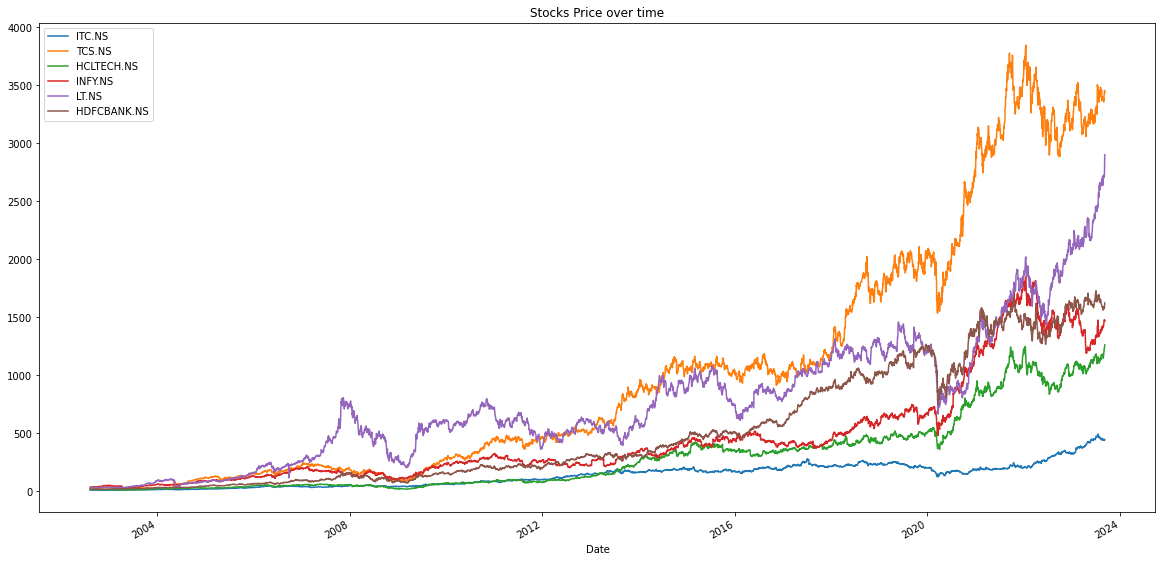

In [7]:
_ = (historical).plot(figsize=(20,10),title='Stocks Price over time')
historical.head(2)

In [8]:
returns = (historical/historical.iloc[0]).fillna(method='backfill')
daily_pct_change = np.log(returns.pct_change() + 1)
vols = daily_pct_change.std() * np.sqrt(252)

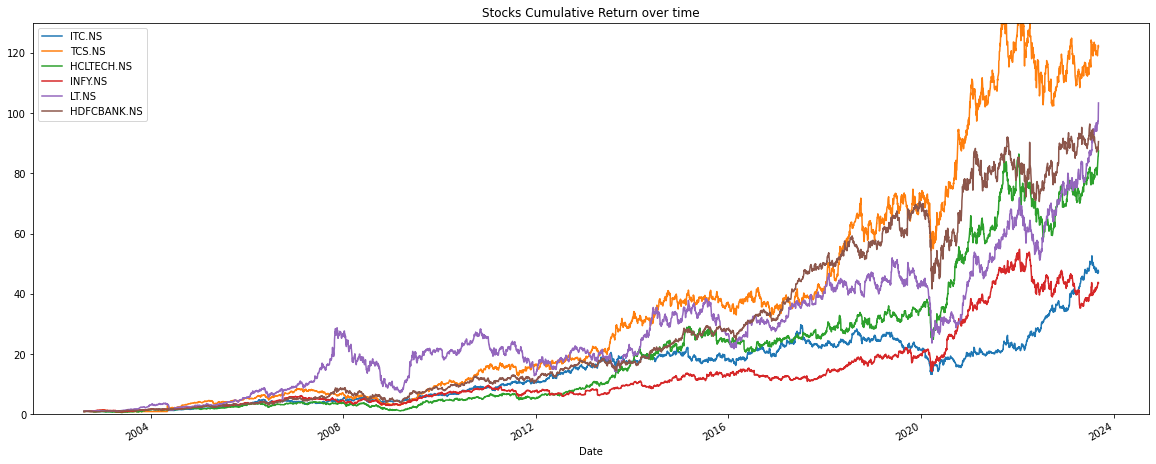

In [9]:
_ = returns.plot(ylim=(0,130), figsize=(20,8),title='Stocks Cumulative Return over time')

In [10]:
returns['PORTFOLIO'] = returns.iloc[:,0:N].sum(axis=1) /N

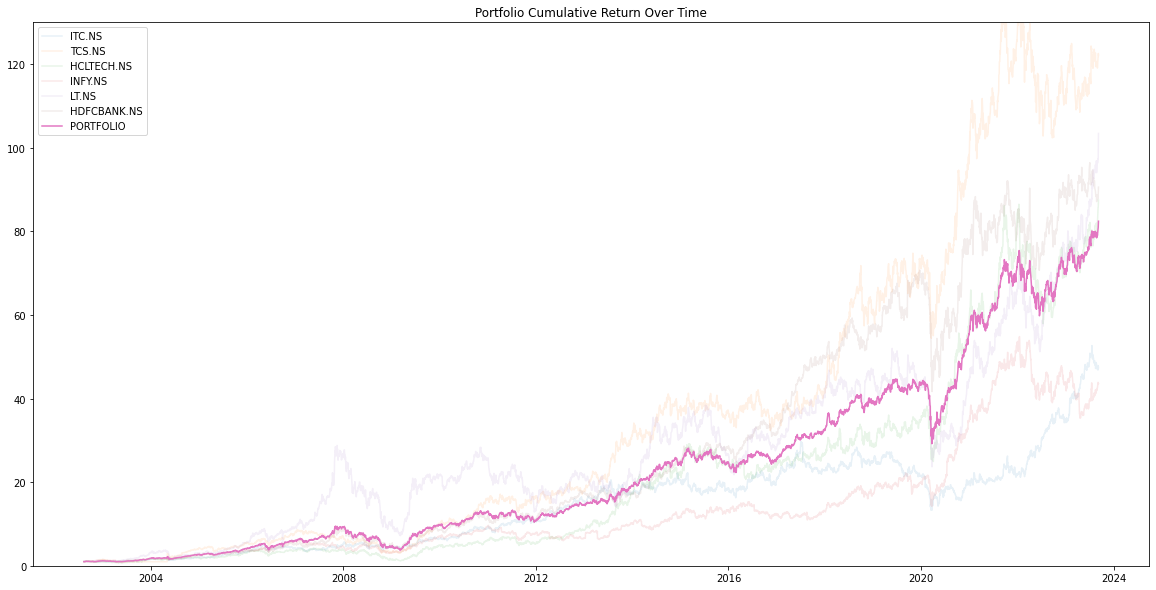

In [11]:
plt.figure(figsize=(20,10))
lines = plt.plot(returns.drop('PORTFOLIO', axis=1), alpha=0.1)
plt.ylim((0,130))
plt.title('Portfolio Cumulative Return Over Time')
plt.plot(returns['PORTFOLIO'], alpha=1)
plt.legend(returns.columns)
plt.show()

In [12]:
daily_pct_change = np.log(returns.pct_change() + 1)
vols = daily_pct_change.std() * np.sqrt(252) # Annual Volatility 

tickers=['ITC.NS', 'TCS.NS','HCLTECH.NS','INFY.NS','LT.NS','HDFCBANK.NS']
prices = [stock_hist(symbol)['Adj Close'] for symbol in tickers]
prices = pd.concat((stock_hist(symbol)['Adj Close'] for symbol in tickers), axis=1, keys=tickers).dropna(axis=0)
prices.head(2)

,ITC.NS,TCS.NS,HCLTECH.NS,INFY.NS,LT.NS,HDFCBANK.NS
Date,,,,,,
2002-08-12,9.345690,28.201380,14.427618,33.716721,28.062887,17.926596
2002-08-13,9.503628,27.819563,14.161989,33.726131,28.089809,18.071850


In [13]:
def diversicheck(symbols, start_day=0, time_horizon=365, **active):
    filtered = [symbol for symbol in symbols if active.get(symbol, True)]
    prices = pd.concat((stock_hist(symbol)['Adj Close'] for symbol in filtered), axis=1, keys=filtered).dropna(axis=0)
    
    
    start_dates = prices.index[0] + datetime.timedelta(days = start_day)
    end_dates = start_dates + datetime.timedelta(days=time_horizon)
    
    prices = prices.loc[start_dates:end_dates]
    
    unit_pos = prices / prices.iloc[0,:]
    basket = unit_pos.sum(axis=1) / unit_pos.shape[1]
    unit_pos.plot(figsize=(20,10),title='Stocks Cumulative Return over time', alpha=0.3)
    basket.plot(figsize=(20,10),legend = True)
    print(f'backtest from {start_dates} to {end_dates}')

In [14]:
# cached_data ={}
prf_stocks = ['ITC.NS', 'TCS.NS','HCLTECH.NS','INFY.NS','LT.NS','HDFCBANK.NS']
active = dict(zip(prf_stocks, [True] * len(prf_stocks)))
_ = interact(diversicheck, symbols =fixed(prf_stocks), start_day=IntSlider(min=0,max=252*10),
             time_horizon=IntSlider(min=0,value=365,max=252*5),**active)

interactive(children=(IntSlider(value=0, description='start_day', max=2520), IntSlider(value=365, description=…

In [15]:
# cached_data ={}
prf_stocks = ['ITC.NS', 'TCS.NS','HCLTECH.NS','INFY.NS','LT.NS','HDFCBANK.NS']
active = dict(zip(prf_stocks, [True] * len(prf_stocks)))
_ = interact(diversicheck, symbols =fixed(prf_stocks), start_day=IntSlider(min=0,max=252*10),
             time_horizon=IntSlider(min=0,value=365,max=252*5),**active)

interactive(children=(IntSlider(value=0, description='start_day', max=2520), IntSlider(value=365, description=…

In [17]:
prf_prices = pd.concat((stock_hist(symbol)['Adj Close'] for symbol in prf_stocks), axis =1, keys=prf_stocks).dropna(axis=0)
prf_returns = (prf_prices.pct_change() + 1)[1:]
log_returns = np.log(prf_returns)
corr = log_returns.corr()

<Axes: >

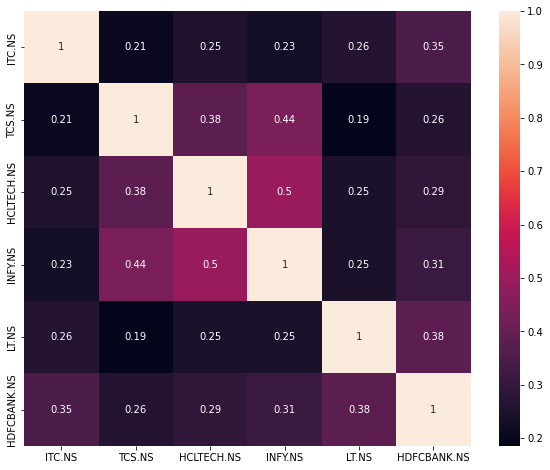

In [18]:
fig, ax = plt.subplots(figsize=(10,8)) 
sns.heatmap(corr, annot=True)

In [19]:
vols = log_returns.std() * np.sqrt(252)
avg_return = (prf_returns-1).mean()


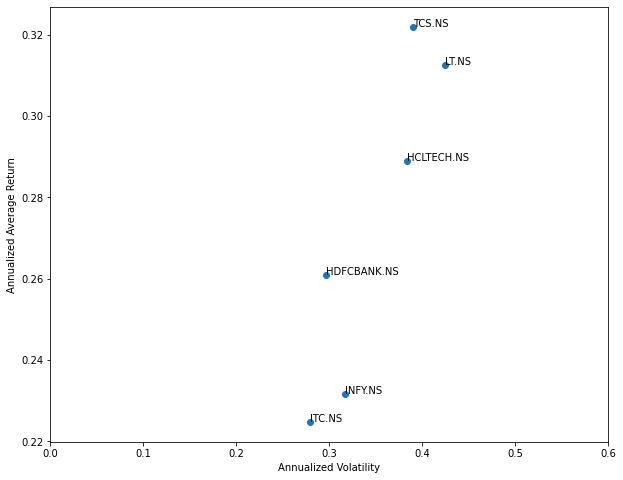

In [20]:
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(vols, avg_return*252)
ax.set_xlabel('Annualized Volatility')
ax.set_ylabel('Annualized Average Return')
ax.set_xlim(0,0.6)
for i, txt in enumerate(prf_stocks):
    ax.annotate(txt, xy=(vols[i], avg_return[i]*252))

In [21]:
number_of_simulations = 1000
investment_horizon = 60
simulated = pd.DataFrame([(prf_returns.iloc[random.choices(
    range(len(prf_returns)), k=investment_horizon)]).mean(axis=1).cumprod().values 
                         for x in range(number_of_simulations)]).T
simulated.head(3)

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.007736,1.029398,1.018937,0.976560,1.004808,1.000319,1.003953,0.994324,1.000759,0.994723,...,1.009222,1.003763,1.007892,1.006255,1.002566,1.014608,0.995332,1.011122,1.006979,0.998320
1,1.019517,1.023260,1.032669,0.995202,0.990880,0.991649,1.006363,0.993057,0.993954,0.993231,...,1.004906,1.030701,1.016656,1.000383,1.011606,1.014770,1.012087,1.011774,0.997563,1.009941
2,1.025726,1.031028,1.045181,1.007078,0.997018,1.002636,1.012650,1.003465,0.980963,0.995896,...,0.997693,1.015501,1.009701,0.988844,1.007919,1.024309,1.008129,1.007797,0.988713,1.010803


<Axes: >

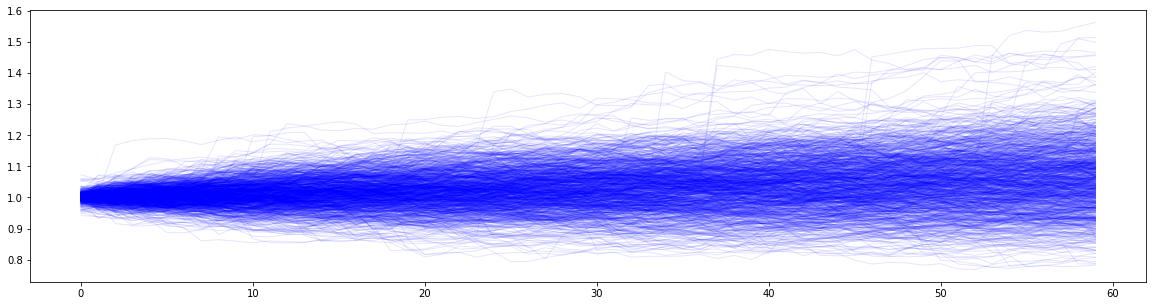

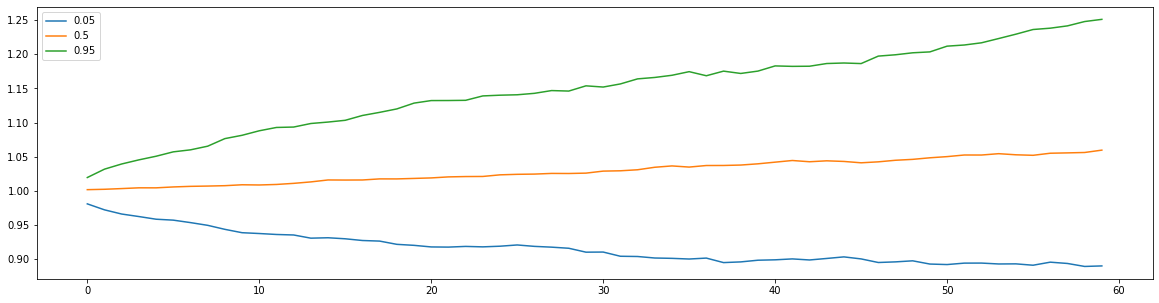

In [22]:
simulated.plot(legend=False, linewidth=1, alpha=0.1, color='blue', figsize=(20,5))
simulated.quantile([0.05, 0.50, 0.95], axis=1).T.plot(figsize=(20,5))

In [23]:
simulated.to_csv('testing1.csv', index=0) # Save Result